In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


In [20]:
with open('data_batch_1', 'rb') as f:
    dat = pickle.load(f, encoding='bytes')

In [21]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(dat[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [22]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

In [23]:
input_layer = Input(shape=(1024,))

In [24]:
hidden_encoding = Dense(512, activation='relu')(input_layer)

In [25]:
encoding_stage = Dense(256, activation='relu')(hidden_encoding)

In [26]:
hidden_decoding = Dense(512, activation='relu')(encoding_stage)

In [27]:
decoding_stage = Dense(1024, activation='sigmoid')(hidden_decoding)

In [28]:
autoencoder = Model(input_layer, decoding_stage)

In [29]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [31]:
autoencoder.fit(images, images, epochs=50)

Epoch 1/50
313/313 [==============================] - 5s 16ms/step - loss: 0.6927
Epoch 2/50
313/313 [==============================] - 5s 17ms/step - loss: 0.6927
Epoch 3/50
313/313 [==============================] - 5s 17ms/step - loss: 0.6926
Epoch 4/50
313/313 [==============================] - 5s 17ms/step - loss: 0.6926
Epoch 5/50
313/313 [==============================] - 5s 17ms/step - loss: 0.6926
Epoch 6/50
313/313 [==============================] - 5s 15ms/step - loss: 0.6926
Epoch 7/50
313/313 [==============================] - 5s 17ms/step - loss: 0.6926
Epoch 8/50
313/313 [==============================] - 6s 19ms/step - loss: 0.6926
Epoch 9/50
313/313 [==============================] - 5s 16ms/step - loss: 0.6926
Epoch 10/50
313/313 [==============================] - 5s 16ms/step - loss: 0.6926
Epoch 11/50
313/313 [==============================] - 5s 15ms/step - loss: 0.6926
Epoch 12/50
313/313 [==============================] - 5s 15ms/step - loss: 0.6926
Epoch 13/50
3

In [32]:
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

In [33]:
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

In [34]:
decoder_output = autoencoder.predict(images[:5])

In [35]:
decoder_output = decoder_output.reshape((-1, 32,32)) * 255

In [36]:
images = images.reshape((-1, 32, 32))

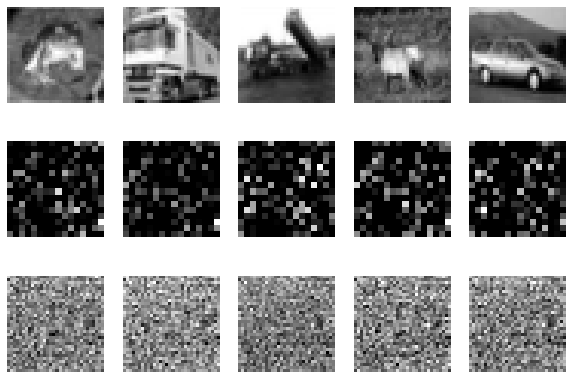

In [41]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        
        
      